In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list
coordinates_lst = list(coordinates)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0], coordinate[1])
    city_name = city.city_name
    country_name = city.country_code

    # If the city is unique, then we will add it to the cities list.
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and countries
    # Print (f'{city_name},{country_name}')
    
    # Count the amount of cities.
len(cities)

627

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_city = city.title()
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_hum = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        
        # Append the city information into city_data list.
        city_data.append({"City": city_city,
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_hum,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | taltal
Processing Record 6 of Set 1 | mayo
Processing Record 7 of Set 1 | puerto escondido
Processing Record 8 of Set 1 | tottori
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | padang
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | tasiilaq
Processing Record 24 of Set 1 | dikson
Processing Record 25 of Set 1 | 

Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | kirakira
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | bintulu
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | mount pleasant
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | samana
Processing Record 45 of Set 4 | galesong
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | tumpat
Processing Record 49 of Set 4 | nabire
Processing Record 50 of Set 4 | mrirt
City not found. Skipping...
Processing Record 1 of Set 5 | manokwari
Processing Record 2 of Set 5 | lashio
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | pascagoula
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | podgorica
Processing Record 8 of Set 5 | matagami
Processing Rec

Processing Record 24 of Set 8 | kashi
Processing Record 25 of Set 8 | vao
Processing Record 26 of Set 8 | play cu
City not found. Skipping...
Processing Record 27 of Set 8 | tommot
Processing Record 28 of Set 8 | saint-ambroise
Processing Record 29 of Set 8 | shahr-e babak
Processing Record 30 of Set 8 | zhanaozen
Processing Record 31 of Set 8 | russell
Processing Record 32 of Set 8 | asmara
Processing Record 33 of Set 8 | garowe
Processing Record 34 of Set 8 | tamworth
Processing Record 35 of Set 8 | kopavogur
Processing Record 36 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 37 of Set 8 | arauca
Processing Record 38 of Set 8 | nurlat
Processing Record 39 of Set 8 | cachoeirinha
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | kushima
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | ahipara
Processing Record 45 of Set 8 | nouakchott
Processing Re

Processing Record 9 of Set 12 | port hedland
Processing Record 10 of Set 12 | shonguy
Processing Record 11 of Set 12 | paraguacu
Processing Record 12 of Set 12 | irsha
Processing Record 13 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 14 of Set 12 | palmer
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | bonavista
Processing Record 17 of Set 12 | baiyin
Processing Record 18 of Set 12 | doha
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | penzance
Processing Record 21 of Set 12 | mahajanga
Processing Record 22 of Set 12 | byron bay
Processing Record 23 of Set 12 | vyazemskiy
Processing Record 24 of Set 12 | lakes entrance
Processing Record 25 of Set 12 | mettur
Processing Record 26 of Set 12 | qaqortoq
Processing Record 27 of Set 12 | marienburg
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | san felipe
Processing Record 30 of Set 12 | canon city
Processing Record 31 of Set 12 | north bend
Proc

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-07-16 03:19:20,-37.6167,-73.6500,49.98,78,83,3.06
1,Geraldton,AU,2021-07-16 03:19:20,-28.7667,114.6000,63.12,77,75,8.05
2,Cape Town,ZA,2021-07-16 03:19:20,-33.9258,18.4232,49.12,81,0,5.75
3,Bredasdorp,ZA,2021-07-16 03:19:21,-34.5322,20.0403,38.52,93,0,1.14
4,Taltal,CL,2021-07-16 03:19:21,-25.4000,-70.4833,56.05,79,13,1.83


In [13]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

## Plot Weather Data

In [14]:
# Pull revelant Data from DF
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

### City Latitude vs Max Temperature 

<function matplotlib.pyplot.show(close=None, block=None)>

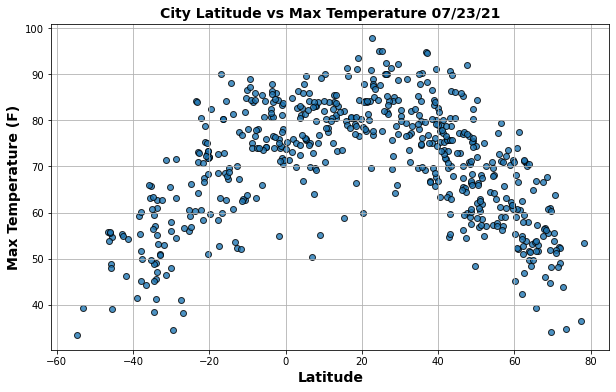

In [15]:
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

### Latitude vs Humidity

<function matplotlib.pyplot.show(close=None, block=None)>

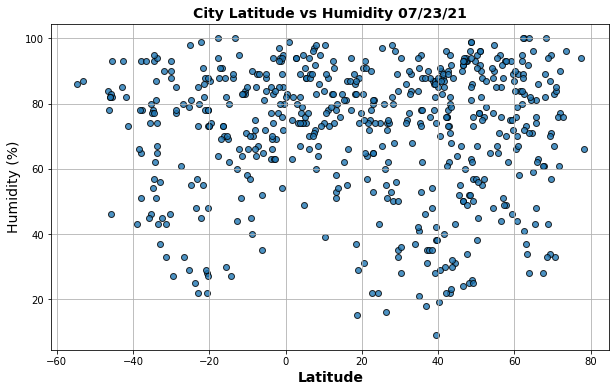

In [16]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

### Latitiude vs Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

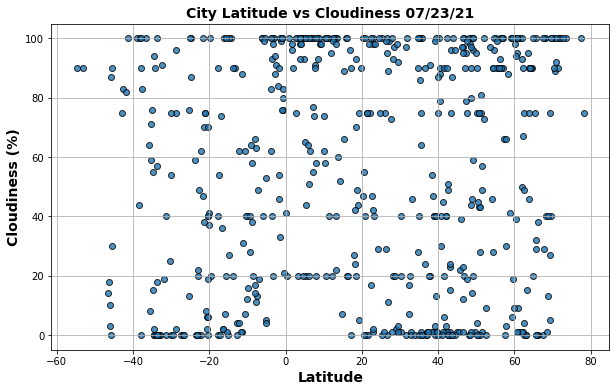

In [17]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

### Latitude vs Wind Speed

<function matplotlib.pyplot.show(close=None, block=None)>

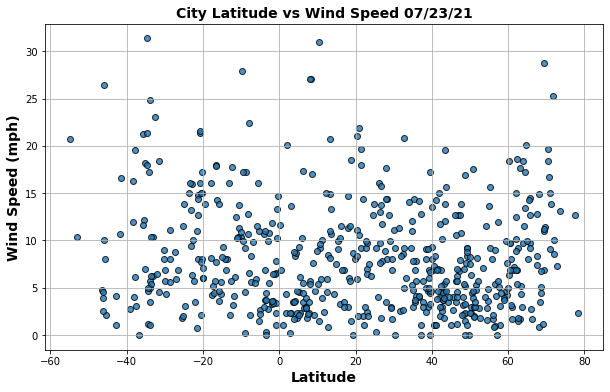

In [18]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show



## Linear Regression of Data by Hemisphere

In [19]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Linear Regression for Latitude vs Max Temperature by Hemisphere

      Slope  Intercept   r Value       p Value  Std Error
0 -0.406009  87.533577 -0.663196  3.794510e-51   0.023172


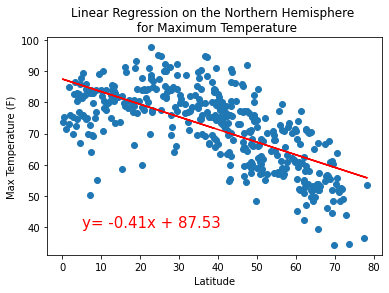

<Figure size 432x288 with 0 Axes>

In [27]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.738217  81.429734  0.746135  9.763833e-33   0.049795


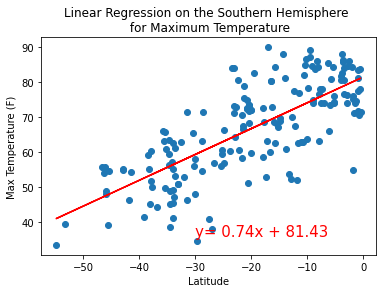

<Figure size 432x288 with 0 Axes>

In [28]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')

### Linear Regression for Latitude vs Humidity by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0 -0.061895   73.80549 -0.059758  0.237232   0.052288


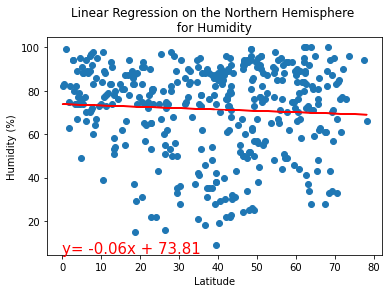

<Figure size 432x288 with 0 Axes>

In [29]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')

      Slope  Intercept  r Value   p Value  Std Error
0  0.105179  73.651038  0.07495  0.321455   0.105783


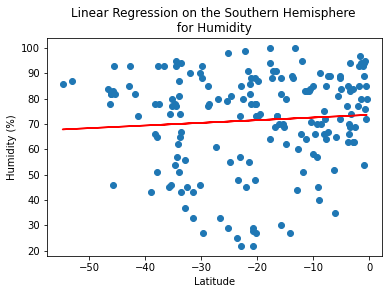

<Figure size 432x288 with 0 Axes>

In [30]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

### Linear Regression for Latitude vs Cloudiness by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0 -0.158047  62.776444 -0.080039  0.113149   0.099541


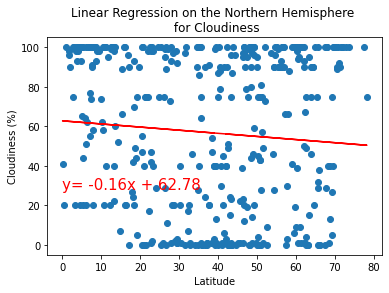

<Figure size 432x288 with 0 Axes>

In [31]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.379475   55.65547  0.136132  0.070809   0.208758


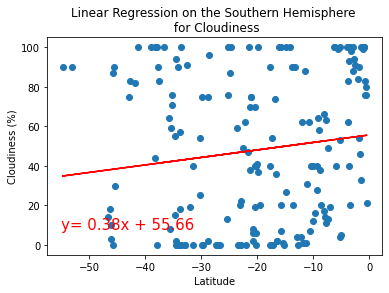

<Figure size 432x288 with 0 Axes>

In [32]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')

### Linear Regression for Latitude vs Wind Speed by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0  0.010134   7.099622  0.037757  0.455433   0.013564


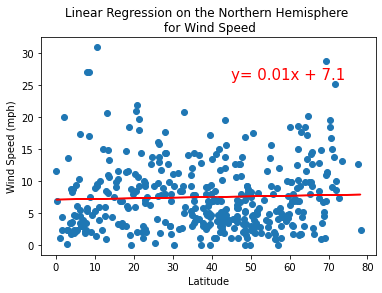

<Figure size 432x288 with 0 Axes>

In [33]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.063939     7.8357 -0.141235  0.060777   0.033879


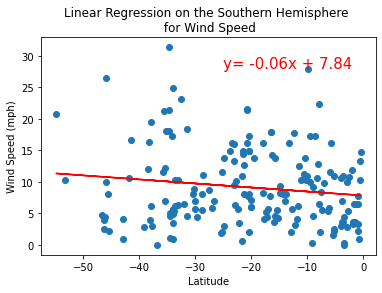

<Figure size 432x288 with 0 Axes>

In [34]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-25,28))
plt.savefig('weather_data/Fig12.png')